**Stage 1: Study Replication**

The performance metrics for each dataset and classifier developed by Doppala et al. are presented in the figure below  (Doppala, Bhattacharyya, Janarthanan, & Baik, 2022).

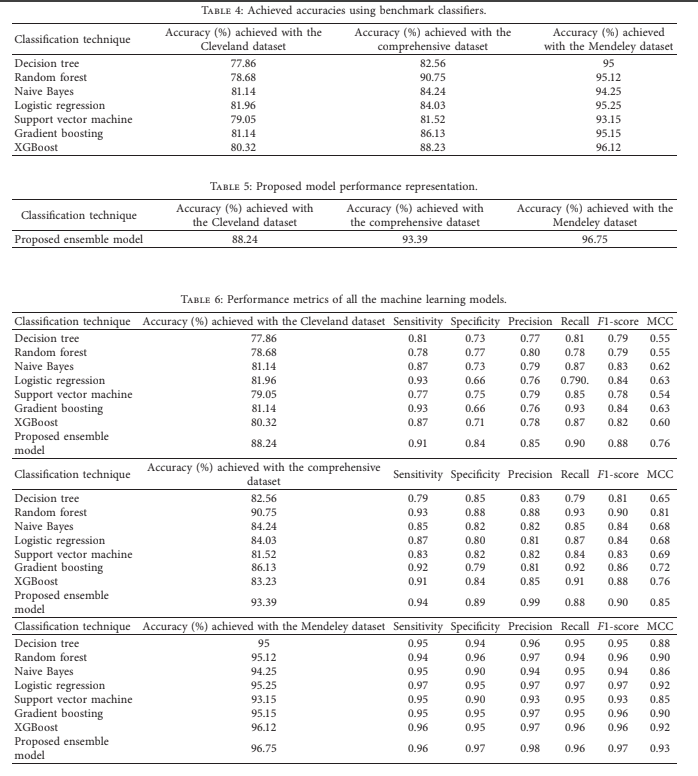

Bibliography

Doppala, B. P., Bhattacharyya, D., Janarthanan, M., & Baik, N. (2022, March 8). A Reliable Machine Intelligence Model for Accurate Identification of Cardiovascular Diseases Using Ensemble Techniques. Hindawi Journal of Healthcare Engineering, 2022. doi:https://doi.org/10.1155/2022/2585235









**Dataset 2: Comprehensive IEEE Dataset**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/heart_statlog_cleveland_hungary_final.csv"
data_ieee = pd.read_csv(path,encoding='utf-8-sig')
data_ieee.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
#Identify duplicate rows in IEEE Clinic Data
ieee_rows = data_ieee.shape[0]
ieee_dups = data_ieee[data_ieee.duplicated(keep=False)].shape[0]
print('There are '+ str(ieee_dups)+ ' duplicate records out of '+ str(ieee_rows)+' total records')

#Check for null values in IEEE dataset
null_ieee =data_ieee.isna().sum().sum()
print("There are " + str(null_ieee) + " null values in the IEEE dataset")

There are 544 duplicate records out of 1190 total records
There are 0 null values in the IEEE dataset


In [ ]:
#Drop duplicate records and display row count
data_ieee = data_ieee.drop_duplicates()
print('Remaining rows: '+str(data_ieee.shape[0]))

Remaining rows: 918


In [ ]:
#one-hot coding of IEEE Data
data_ieee_coded = pd.get_dummies(data_ieee, columns=['chest pain type','resting ecg','ST slope'], prefix=['chest pain type','resting ecg','ST slope'],drop_first=True)

In [ ]:
data_ieee_coded.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,0,1,0,0


In [ ]:
#Output new column names as list for ease of use in test train split below
data_ieee_coded.columns.values

array(['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar',
       'max heart rate', 'exercise angina', 'oldpeak', 'target',
       'chest pain type_2', 'chest pain type_3', 'chest pain type_4',
       'resting ecg_1', 'resting ecg_2', 'ST slope_1', 'ST slope_2',
       'ST slope_3'], dtype=object)

In [ ]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_ieee_coded.loc[:,['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'resting ecg_1', 'resting ecg_2', 'ST slope_1', 'ST slope_2', 'ST slope_3']]
dependent = data_ieee.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [ ]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the minmaxscaler
from sklearn.preprocessing import MinMaxScaler

#Subset of numerical features
ieee_numerical =['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

#Initialize RobustScaler
scaler = MinMaxScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[ieee_numerical])

#Scale the training data using the RobustScaler instance
x_train[ieee_numerical] = scaler.transform(x_train[ieee_numerical])
#Scale the testing data using the RobustScaler instance
x_test[ieee_numerical] = scaler.transform(x_test[ieee_numerical])

In [52]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Initialize the decision tree classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_decision_tree = DecisionTreeClassifier(random_state=0)

#Fit the training data set to the decision tree model
ieee_decision_tree.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_decision_tree model
target_pred_decision_tree = ieee_decision_tree.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,79.89,0.75,0.819,0.835,0.827,0.587


In [53]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=0)

#Fit the training data set to the random forest classifier
ieee_random_forest.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_random_forest model
target_pred_random_forest = ieee_random_forest.predict(x_test)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,84.78,0.795,0.855,0.887,0.87,0.687


In [54]:
#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Initialize the naive bayes models and assign to variable
ieee_naive_numerical = GaussianNB()
ieee_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
ieee_categorical_nb = ['sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'resting ecg_1', 'resting ecg_2', 'ST slope_1', 'ST slope_2', 'ST slope_3']
ieee_numerical_nb = ['age', 'resting bp s',	'cholesterol', 'max heart rate','oldpeak']

# Fit the categorical features in the training data set to the categorical naive bayes model
ieee_naive_categorical.fit(x_train[ieee_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
ieee_naive_numerical.fit(x_train[ieee_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = ieee_naive_categorical.predict_proba(x_test[ieee_categorical_nb])
probability_numerical= ieee_naive_numerical.predict_proba(x_test[ieee_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Naive Bayes,85.6,0.801,0.86,0.896,0.878,0.704


In [55]:
#Logistic Regression

#Import logistic regression model from scikit-learn libraries
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model and assign to variable ieee_logistic_reg variable. Assign random_state 16 to reproduce results
ieee_logistic_reg = LogisticRegression(random_state=0)

#Fit the training data set to the logistic model
ieee_logistic_reg.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the ieee_logistic_reg
target_pred_logistic = ieee_logistic_reg.predict(x_test)

accuracy_logistic =  round(accuracy_score(y_test, target_pred_logistic),4)*100
precision_logistic = round(precision_score(y_test, target_pred_logistic, pos_label=1),3)
recall_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=1),3)
f1_score_logistic = round(f1_score(y_test, target_pred_logistic, pos_label=1),3)
mcc_logistic = round(matthews_corrcoef(y_test, target_pred_logistic),3)
specificity_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic = [["Logistic Regression", accuracy_logistic,specificity_logistic,precision_logistic,recall_logistic,f1_score_logistic,mcc_logistic]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_logistic_regression = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Logistic Regression,85.05,0.782,0.849,0.901,0.874,0.692


In [56]:
#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='linear', random_state=0)

#Fit the training data set to the support vector machine classifier
ieee_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_support_vector
target_pred_support_vector = ieee_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector,84.78,0.795,0.855,0.887,0.87,0.687


In [57]:
#The article does indicate the kernal type or mention if LinearSVC was applied. Additional support vector machine models have been constructed to identify if an accuracy more in-line with the research paper is possible.

#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='rbf', random_state=0) #using a radial basis function

#Fit the training data set to the support vector machine classifier
ieee_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_support_vector
target_pred_support_vector = ieee_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector,86.14,0.788,0.855,0.915,0.884,0.715


In [58]:
#The article does indicate the kernal type or mention if LinearSVC was applied. Additional support vector machine models have been constructed to identify if an accuracy more in-line with the research paper is possible.

#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='rbf', random_state=0)

#Fit the training data set to the support vector machine classifier
ieee_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_support_vector
target_pred_support_vector = ieee_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector,86.14,0.788,0.855,0.915,0.884,0.715


In [59]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,84.51,0.795,0.854,0.882,0.868,0.682


In [60]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)

#Fit the training data set to the support vector machine classifier
ieee_xgb.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the ieee_xgb
target_pred_xgb = ieee_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,86.14,0.814,0.868,0.896,0.882,0.715


In [61]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier

#Initialize a categorical naive bayes classifier and train using categorical training set
ensemble_categorical_nb = CategoricalNB()
ensemble_categorical_nb.fit(x_train[ieee_categorical_nb], y_train.values.ravel())

#Initialize a gaussian naive bayes classifier and train using numerical (i.e continuous numerical features) training set
ensemble_numerical_nb = GaussianNB()
ensemble_numerical_nb.fit(x_train[ieee_numerical_nb], y_train.values.ravel())

# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state=0)
ensemble_random_forest.fit(x_train, y_train.values.ravel())

ensemble_svm = svm.SVC(probability=True, random_state = 0)
ensemble_svm.fit(x_train, y_train.values.ravel())

ensemble_gradient = GradientBoostingClassifier(random_state = 0)
ensemble_gradient.fit(x_train, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_categorical_nb',ensemble_categorical_nb),('ensemble_numerical_nb',ensemble_numerical_nb),('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient),('ensemble_svm', ensemble_svm)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_train[ieee_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_train[ieee_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_train),
                     ensemble_gradient.predict_proba(x_train),
                     ensemble_svm.predict_proba(x_train)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_test[ieee_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_test[ieee_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_test),
                     ensemble_gradient.predict_proba(x_test),
                     ensemble_svm.predict_proba(x_test)])
)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Ensemble,85.05,0.795,0.855,0.892,0.873,0.693


In [62]:
#Summary table - Stage 1 Basic Results

# Use concat to append DataFrames vertically
summary = pd.concat([st1_pm_decision_tree, st1_pm_random_forest, st1_pm_naive_bayes, st1_pm_logistic_regression, st1_pm_support_vector, st1_pm_gradient, st1_pm_xgb, st1_pm_ensemble], ignore_index=True)

#Remove row index values
summary.index = ["","","","","","","",""]
summary

#Again, two tree based classifiers, decision tree and random forest appear to underperforming. The Ensemble model is does not achieve a similar accuracy to the study

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,79.89,0.750,0.819,0.835,0.827,0.587
,Random Forest,84.78,0.795,0.855,0.887,0.870,0.687
,Naive Bayes,85.60,0.801,0.860,0.896,0.878,0.704
,Logistic Regression,85.05,0.782,0.849,0.901,0.874,0.692
,Support Vector,86.14,0.788,0.855,0.915,0.884,0.715
,Gradient Boosting,84.51,0.795,0.854,0.882,0.868,0.682
,XGBoost,86.14,0.814,0.868,0.896,0.882,0.715
,Ensemble,85.05,0.795,0.855,0.892,0.873,0.693


**Stage 1A: Changes to Approximate Study Accuracy**

Hyperparameter tuning will be attempted to approximate the accuracy measure of the study paper.

In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_dt = GridSearchCV(ieee_decision_tree , param_grid, cv=10)
grid_ieee_dt.fit(x_train, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_ieee_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
ieee_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
ieee_decision_tree.fit(x_train, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = ieee_decision_tree.predict(x_test)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,77.45,0.718,0.797,0.816,0.807,0.536


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 42 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_ieee_rf = GridSearchCV(ieee_random_forest , param_grid, cv=10)
grid_ieee_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_ieee_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
ieee_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
ieee_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Despite performing GridSearchCV, the accuracy remains unchanged. RandomSearchCV is attempted next

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,78.26,0.712,0.797,0.835,0.816,0.552


In [ ]:
#Import RandomizedSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 42 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_rf = RandomizedSearchCV(ieee_random_forest , param_grid, cv=10)
grid_ieee_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_ieee_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
ieee_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
ieee_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Results are the same despite performing RandomSearchCV

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,84.78,0.795,0.855,0.887,0.87,0.687


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable ieee_gradient. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_ieee_gb = GridSearchCV(ieee_gradient, param_dist, cv=10)
grid_ieee_gb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_ieee_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
ieee_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
ieee_gradient.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,85.05,0.801,0.858,0.887,0.872,0.693


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_xgb = GridSearchCV(ieee_xgb , param_grid, cv=10)
grid_ieee_xgb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_ieee_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
ieee_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
ieee_xgb.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,86.14,0.814,0.868,0.896,0.882,0.715


**Stage 2: Improvements to Classifiers**

In [128]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/heart_statlog_cleveland_hungary_final.csv"
data_ieee = pd.read_csv(path,encoding='utf-8-sig')
data_ieee.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [129]:
#Identify duplicate rows in IEEE Clinic Data
ieee_rows = data_ieee.shape[0]
ieee_dups = data_ieee[data_ieee.duplicated(keep=False)].shape[0]
print('There are '+ str(ieee_dups)+ ' duplicate records out of '+ str(ieee_rows)+' total records')

#Check for null values in IEEE dataset
null_ieee =data_ieee.isna().sum().sum()
print("There are " + str(null_ieee) + " null values in the IEEE dataset")

There are 544 duplicate records out of 1190 total records
There are 0 null values in the IEEE dataset


In [130]:
#Drop duplicate records and display row count
data_ieee = data_ieee.drop_duplicates()
print('Remaining rows: '+str(data_ieee.shape[0]))

Remaining rows: 918


In [95]:
#one-hot coding of IEEE Data
data_ieee_coded = pd.get_dummies(data_ieee, columns=['chest pain type','resting ecg','ST slope'], prefix=['chest pain type','resting ecg','ST slope'],drop_first=True)

In [131]:
data_ieee_coded.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,0,1,0,0


In [132]:
#Output new column names as list for ease of use in test train split below
data_ieee_coded.columns.values

array(['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar',
       'max heart rate', 'exercise angina', 'oldpeak', 'target',
       'chest pain type_2', 'chest pain type_3', 'chest pain type_4',
       'resting ecg_1', 'resting ecg_2', 'ST slope_1', 'ST slope_2',
       'ST slope_3'], dtype=object)

In [133]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_ieee_coded.loc[:,['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'resting ecg_1', 'resting ecg_2', 'ST slope_1', 'ST slope_2', 'ST slope_3']]
dependent = data_ieee.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [134]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[ieee_numerical])

#Scale the training data using the RobustScaler instance
x_train[ieee_numerical] = scaler.transform(x_train[ieee_numerical])
#Scale the testing data using the RobustScaler instance
x_test[ieee_numerical] = scaler.transform(x_test[ieee_numerical])

In [11]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
ieee_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = ieee_merge[ieee_merge['target'] == 1]
healthy = ieee_merge[ieee_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['age']
age_healthy = healthy['age']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [["age", t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,age,6.382587,3.712085e-10,Y


In [12]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
ieee_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = ieee_merge[ieee_merge['target'] == 1]
healthy = ieee_merge[ieee_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['resting bp s']
age_healthy = healthy['resting bp s']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['resting bp s', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,resting bp s,3.289481,0.001068,Y


In [13]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
ieee_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = ieee_merge[ieee_merge['target'] == 1]
healthy = ieee_merge[ieee_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['cholesterol']
age_healthy = healthy['cholesterol']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['cholesterol', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,cholesterol,-5.895366,6.539669e-09,Y


In [14]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
ieee_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = ieee_merge[ieee_merge['target'] == 1]
healthy = ieee_merge[ieee_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['max heart rate']
age_healthy = healthy['max heart rate']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['max heart rate', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,max heart rate,-11.044744,9.606123e-26,Y


In [15]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
ieee_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = ieee_merge[ieee_merge['target'] == 1]
healthy = ieee_merge[ieee_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['oldpeak']
age_healthy = healthy['oldpeak']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['oldpeak', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,oldpeak,11.038182,1.019753e-25,Y


In [16]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
ieee_sex = pd.crosstab(x_train['sex'], y_train['target'])

# Calculate odds ratio and p-value for ieee sex feature
odds_ratio, p_value = fisher_exact(ieee_sex)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['sex', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,sex,3.381503,2.009190e-08,Y


In [17]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
ieee_fbs = pd.crosstab(x_train['fasting blood sugar'], y_train['target'])

# Calculate odds ratio and p-value for ieee fasting blood sugar feature
odds_ratio, p_value = fisher_exact(ieee_fbs)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['fasting blood sugar', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,fasting blood sugar,4.464925,4.305413e-11,Y


In [18]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
ieee_exang = pd.crosstab(x_train['exercise angina'], y_train['target'])

# Calculate odds ratio and p-value for ieee fasting blood sugar feature
odds_ratio, p_value = fisher_exact(ieee_exang)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['exercise angina', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,exercise angina,11.100917,1.491012e-34,Y


In [19]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
ieee_chi = data_ieee.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
ieee_cp = pd.crosstab(ieee_chi['chest pain type'], ieee_chi['target'])

# Calculate chi_sq value and p-value for ieee chest pain feature
chi_sq, p_value, dof, expected = chi2_contingency(ieee_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['chest pain type', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,chest pain type,146.509742,1.491494e-31,Y


In [20]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
ieee_chi = data_ieee.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
ieee_cp = pd.crosstab(ieee_chi['resting ecg'], ieee_chi['target'])

# Calculate chi_sq value and p-value for ieee restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(ieee_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['resting ecg', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,resting ecg,4.869786,0.087607,N


In [21]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
ieee_chi = data_ieee.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
ieee_cp = pd.crosstab(ieee_chi['ST slope'], ieee_chi['target'])

# Calculate chi_sq value and p-value for ieee restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(ieee_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['ST slope', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,ST slope,252.975944,1.486477e-54,Y


In [22]:
#Modify training and test records

#Features to drop based on simple filters
features_remove = ['resting ecg_1','resting ecg_2']

#Remove selected features from x_train and x_test to evaluate model based on hold-out method
x_train_simple = x_train.drop(columns=features_remove)
x_test_simple = x_test.drop(columns=features_remove)

In [23]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_remove = ['resting ecg_1','resting ecg_2']

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['age', 'cholesterol', 'max heart rate', 'resting bp s', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_decision_tree.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the ieee_decision_tree model
target_pred_decision_tree = ieee_decision_tree.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,79.62,0.763,0.825,0.821,0.823,0.583,0.007592,278.57


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_dt = GridSearchCV(ieee_decision_tree , param_grid, cv=10)
grid_ieee_dt.fit(x_train_simple, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_ieee_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
ieee_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
ieee_decision_tree.fit(x_train_simple, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = ieee_decision_tree.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,77.45,0.718,0.797,0.816,0.807,0.536


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = ieee_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       79.52
Precision      83.57
Recall         78.86
F1 Score       80.96
MCC            59.23
Specificity    80.32
dtype: float64

Standard Deviation Metrics:
Accuracy       4.51
Precision      5.45
Recall         6.08
F1 Score       4.20
MCC            9.26
Specificity    7.60
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_random_forest.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the ieee_random_forest model
target_pred_random_forest = ieee_random_forest.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,83.15,0.776,0.841,0.873,0.856,0.653,0.218987,278.57


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 42 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_ieee_rf = GridSearchCV(ieee_random_forest , param_grid, cv=10)
grid_ieee_rf.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_ieee_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
ieee_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
ieee_random_forest.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_random_forest.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

{'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 100}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,78.26,0.718,0.8,0.83,0.815,0.552


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= ieee_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       86.78
Precision      86.48
Recall         90.42
F1 Score       88.33
MCC            73.37
Specificity    82.28
dtype: float64

Standard Deviation Metrics:
Accuracy       3.65
Precision      3.91
Recall         4.30
F1 Score       3.21
MCC            7.44
Specificity    5.80
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
ieee_naive_numerical = GaussianNB()
ieee_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
ieee_categorical_nb = ['sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'ST slope_1', 'ST slope_2','ST slope_3']
ieee_numerical_nb = ['age','resting bp s','cholesterol','max heart rate','oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
ieee_naive_categorical.fit(x_train_simple[ieee_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
ieee_naive_numerical.fit(x_train_simple[ieee_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = ieee_naive_categorical.predict_proba(x_test_simple[ieee_categorical_nb])
probability_numerical= ieee_naive_numerical.predict_proba(x_test_simple[ieee_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,86.14,0.808,0.864,0.901,0.882,0.715,0.015864,278.57


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

#List categorical and numerical feature names

ieee_categorical_nb = ['sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'ST slope_1', 'ST slope_2','ST slope_3']
ieee_numerical_nb = ['age','resting bp s','cholesterol','max heart rate','oldpeak']

#Initialize Naive Bayes models and assign to variables
ieee_naive_categorical = CategoricalNB()
ieee_naive_numerical = GaussianNB()

#Combine categorical and numerical features
x_naive = x_simple[ieee_categorical_nb + ieee_numerical_nb]

#Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []
memory_list = []
computational_list = []

#Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_naive, y_simple):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_naive.iloc[train_index], x_naive.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Begin timing of fitting and prediction process
    start_time = timeit.default_timer()

    #Fit the training data set to the categorical and numerical Naive Bayes models
    ieee_naive_categorical.fit(x_train_fold[ieee_categorical_nb], y_train_fold.values.ravel())
    ieee_naive_numerical.fit(x_train_fold[ieee_numerical_nb], y_train_fold.values.ravel())

    #Predict probabilities for using categorical and numerical features
    probability_categorical = ieee_naive_categorical.predict_proba(x_test_fold[ieee_categorical_nb])
    probability_numerical = ieee_naive_numerical.predict_proba(x_test_fold[ieee_numerical_nb])

    #Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    #Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    #Stop timing of fitting and prediction process
    end_time = timeit.default_timer()

    #Calculate total time
    computational_time = end_time - start_time
    #Calculate memory usage in megabytes
    memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))
    memory_list.append(memory_usage)
    computational_list.append(computational_time)

#Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
    'Memory Usage': memory_list,
    'Computational Speed': computational_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive

Mean Metrics:
Accuracy       86.60
Precision      86.67
Recall         89.78
F1 Score       88.09
MCC            73.11
Specificity    82.68
dtype: float64

Standard Deviation Metrics:
Accuracy       3.08
Precision      3.57
Recall         5.11
F1 Score       2.84
MCC            6.25
Specificity    5.45
dtype: float64


In [24]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_logistic_reg.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the ieee_logistic_reg model
target_pred_logistic_reg = ieee_logistic_reg.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,85.6,0.801,0.86,0.896,0.878,0.704,0.019416,198.26


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier and assign it to the variable ieee_logistic_reg. Assign random_state 42 to reproduce results
ieee_logistic_reg = LogisticRegression(random_state=42)

# A parameter grid for logistic regression
param_grid = {'max_iter':[100,110,120,130,140],
              'C' : [1.0,1.5,2.0,2.5]}

# Initialize the GridSearchCV class using the logistic regression model, the parameter grid, and a 10-fold cross-validation
grid_ieee_lr = GridSearchCV(ieee_logistic_reg, param_grid, cv=10)
grid_ieee_lr.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_lr = grid_ieee_lr.best_params_
print(best_params_lr)

#Fit the model using the best parameters
ieee_logistic_reg = LogisticRegression(**best_params_lr, random_state=42)
ieee_logistic_reg.fit(x_train_simple, y_train.values.ravel())

#Use the best model to calculate predictions
target_pred_logistic_reg = ieee_logistic_reg.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_logistic_reg = round(accuracy_score(y_test, target_pred_logistic_reg), 4) * 100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg), 3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0), 3)

# Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_score_logistic_reg, mcc_logistic_reg]]

# Create a DataFrame of performance metrics
grid_lr_pm = pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_lr_pm.index = [""]

grid_lr_pm

{'C': 1.0, 'max_iter': 100}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Logistic Regression,85.6,0.801,0.86,0.896,0.878,0.704


In [26]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_logistic_reg = LogisticRegression(C= 1.0, max_iter= 100, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= ieee_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0),2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       86.64
Precision       0.87
Recall          0.89
F1 Score        0.88
MCC             0.73
Specificity     0.83
dtype: float64

Standard Deviation Metrics:
Accuracy       3.37
Precision      0.03
Recall         0.04
F1 Score       0.03
MCC            0.07
Specificity    0.05
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_support_vector.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = ieee_support_vector.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,84.78,0.795,0.855,0.887,0.87,0.687,0.058467,278.57


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the SVM classifier and assign it to the variable ieee_svm. Assign random_state 42 to reproduce results
ieee_svm = SVC(random_state=42)

# A parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV class using the SVM model, the parameter grid, and a 10-fold cross-validation
grid_ieee_svm = GridSearchCV(ieee_svm, param_grid, cv=10)
grid_ieee_svm.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_svm = grid_ieee_svm.best_params_
print(best_params_svm)

# Fit the model using the best parameters
ieee_svm = SVC(**best_params_svm, random_state=42)
ieee_svm.fit(x_train_simple, y_train.values.ravel())

# Use the best model to calculate predictions
target_pred_svm = ieee_svm.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_svm = round(accuracy_score(y_test, target_pred_svm), 4) * 100
precision_svm = round(precision_score(y_test, target_pred_svm, pos_label=1), 3)
recall_svm = round(recall_score(y_test, target_pred_svm, pos_label=1), 3)
f1_score_svm = round(f1_score(y_test, target_pred_svm, pos_label=1), 3)
mcc_svm = round(matthews_corrcoef(y_test, target_pred_svm), 3)
specificity_svm = round(recall_score(y_test, target_pred_svm, pos_label=0), 3)

# Organize performance metrics into a list
performance_svm = [["Support Vector Machine", accuracy_svm, specificity_svm, precision_svm, recall_svm, f1_score_svm, mcc_svm]]

# Create a DataFrame of performance metrics
grid_svm_pm = pd.DataFrame(performance_svm, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_svm_pm.index = [""]

grid_svm_pm

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector Machine,85.05,0.769,0.843,0.91,0.875,0.693


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= ieee_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       87.07
Precision      87.36
Recall         89.76
F1 Score       88.49
MCC            73.91
Specificity    83.74
dtype: float64

Standard Deviation Metrics:
Accuracy       3.50
Precision      3.75
Recall         3.85
F1 Score       3.08
MCC            7.12
Specificity    5.37
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_gradient.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_gradient = ieee_gradient.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient", accuracy_gradient, specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient,84.78,0.814,0.864,0.873,0.869,0.688,0.098315,278.57


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable ieee_gradient. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_ieee_gb = GridSearchCV(ieee_gradient, param_dist, cv=10)
grid_ieee_gb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_ieee_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
ieee_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
ieee_gradient.fit(x_train_simple, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test_simple)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,85.87,0.801,0.86,0.901,0.88,0.709


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       86.38
Precision      87.08
Recall         88.58
F1 Score       87.78
MCC            72.51
Specificity    83.66
dtype: float64

Standard Deviation Metrics:
Accuracy       3.95
Precision      3.51
Recall         4.67
F1 Score       3.64
MCC            7.94
Specificity    4.71
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_xgb.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = ieee_xgb.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,84.51,0.788,0.851,0.887,0.868,0.681,0.054945,279.09


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_xgb = GridSearchCV(ieee_xgb , param_grid, cv=10)
grid_ieee_xgb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_ieee_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
ieee_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
ieee_xgb.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_xgb.predict(x_test_simple)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,84.51,0.788,0.851,0.887,0.868,0.681


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       86.38
Precision      87.08
Recall         88.58
F1 Score       87.78
MCC            72.51
Specificity    83.66
dtype: float64

Standard Deviation Metrics:
Accuracy       3.95
Precision      3.51
Recall         4.67
F1 Score       3.64
MCC            7.94
Specificity    4.71
dtype: float64


In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier


# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42)
ensemble_random_forest.fit(x_train_simple, y_train.values.ravel())


ensemble_gradient = GradientBoostingClassifier(random_state = 42)
ensemble_gradient.fit(x_train_simple, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_gradient.predict_proba(x_train_simple),
                     ensemble_random_forest.predict_proba(x_train_simple)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_gradient.predict_proba(x_test_simple),
                     ensemble_random_forest.predict_proba(x_test_simple)])
)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Ensemble,83.15,0.763,0.835,0.882,0.858,0.653,0.293246,279.09


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize classifiers

ensemble_random_forest = RandomForestClassifier(random_state=42)
ensemble_gradient = GradientBoostingClassifier(random_state=42)

# Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest', ensemble_random_forest),('ensemble_gradient', ensemble_gradient)]

ensemble = VotingClassifier(estimators=algorithms, voting='soft')

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]


    # Fit the entire training set
    ensemble_random_forest.fit(x_train_fold, y_train_fold.values.ravel())
    ensemble_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Specify Algorithms and initialize ensemble model using a soft voting classifier
    algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
    ensemble = VotingClassifier(estimators=algorithms, voting='soft')

    #Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
    ensemble.fit(np.column_stack([ensemble_random_forest.predict_proba(x_train_fold),ensemble_gradient.predict_proba(x_train_fold),]),y_train_fold.values.ravel())

    #With the ensemble model, we can make predictions on the target values
    target_pred_ensemble = ensemble.predict(np.column_stack([ensemble_random_forest.predict_proba(x_test_fold), ensemble_gradient.predict_proba(x_test_fold)]))

    #Calculate performance metrics for the current fold
    accuracy_list.append(accuracy_score(y_test_fold, target_pred_ensemble))
    precision_list.append(precision_score(y_test_fold, target_pred_ensemble, pos_label=1))
    recall_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=1))
    f1_list.append(f1_score(y_test_fold, target_pred_ensemble, pos_label=1))
    mcc_list.append(matthews_corrcoef(y_test_fold, target_pred_ensemble))
    specificity_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=0))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = performance_metrics_fold.mean()
std_metrics = performance_metrics_fold.std()

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold


Mean Metrics:
Accuracy       0.867117
Precision      0.863743
Recall         0.904209
F1 Score       0.882635
MCC            0.732670
Specificity    0.821138
dtype: float64

Standard Deviation Metrics:
Accuracy       0.037880
Precision      0.039371
Recall         0.048172
F1 Score       0.033926
MCC            0.076620
Specificity    0.059169
dtype: float64


In [ ]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(random_forest_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['resting ecg_1', 'ST slope_3', 'chest pain type_3','resting ecg_2','fasting blood sugar','chest pain type_2', 'sex']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_remove = ['resting ecg_1', 'ST slope_3', 'chest pain type_3','resting ecg_2','fasting blood sugar','chest pain type_2', 'sex']

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['age', 'cholesterol', 'max heart rate', 'resting bp s', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [ ]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 0 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
ieee_random_forest.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the ieee_random_forest model
target_pred_random_forest = ieee_random_forest.predict(x_test_embedded)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 42 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_ieee_rf = GridSearchCV(ieee_random_forest , param_grid, cv=10)
grid_ieee_rf.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_ieee_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
ieee_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
ieee_random_forest.fit(x_train_embedded, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = ieee_random_forest.predict(x_test_embedded)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

{'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,77.45,0.718,0.797,0.816,0.807,0.536


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= ieee_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

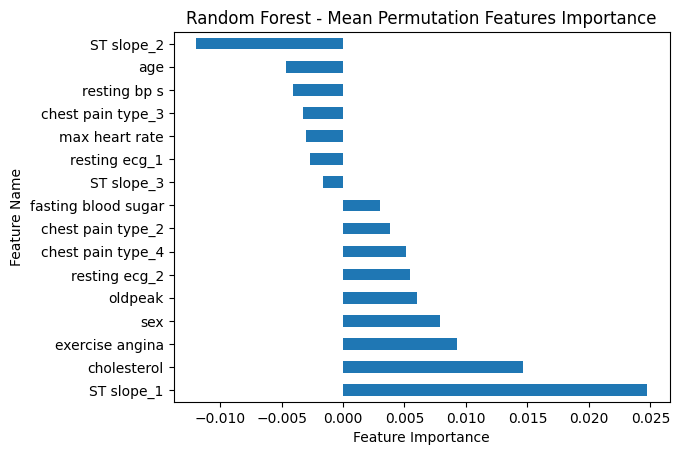

In [35]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
random_permutation= permutation_importance(random_forest_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(random_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest - Mean Permutation Features Importance')
plt.show()



#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['resting bp s', 'chest pain type_3','max heart rate','resting ecg_1','ST slope_3','fasting blood sugar','chest pain type_2']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [46]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_remove = ['resting bp s', 'chest pain type_3','max heart rate','resting ecg_1','ST slope_3','fasting blood sugar','chest pain type_2']

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['age', 'cholesterol', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [47]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable ieee_random_forest. Assign random_state 0 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
ieee_random_forest.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the ieee_random_forest model
target_pred_random_forest = ieee_random_forest.predict(x_test_perm)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,80.98,0.731,0.814,0.868,0.84,0.608


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= ieee_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       85.00
Precision      85.06
Recall         88.71
F1 Score       86.75
MCC            69.79
Specificity    80.41
dtype: float64

Standard Deviation Metrics:
Accuracy       3.31
Precision      3.92
Recall         4.32
F1 Score       2.87
MCC            6.73
Specificity    6.22
dtype: float64


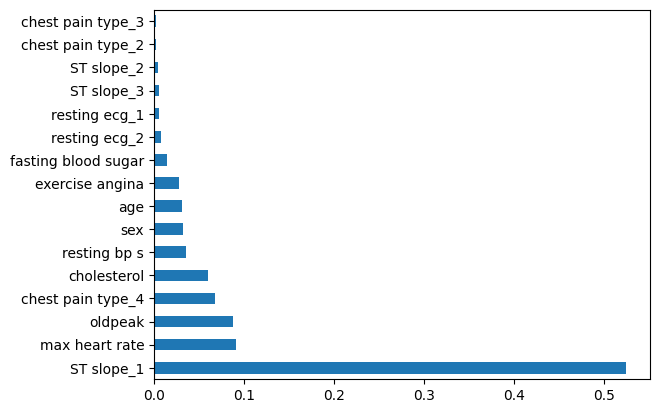

In [27]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(gradient_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['chest pain type_3','chest pain type_2', 'ST slope_2','ST slope_3','resting ecg_1','resting ecg_2','fasting blood sugar','exercise angina','age','sex','resting bp s']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [28]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =[ 'cholesterol', 'max heart rate', 'oldpeak']

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [29]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,80.98,0.788,0.841,0.825,0.833,0.612


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable ieee_gradient. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_ieee_gb = GridSearchCV(ieee_gradient, param_dist, cv=10)
grid_ieee_gb.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_ieee_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
ieee_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
ieee_gradient.fit(x_train_embedded, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,82.88,0.782,0.843,0.863,0.853,0.648


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

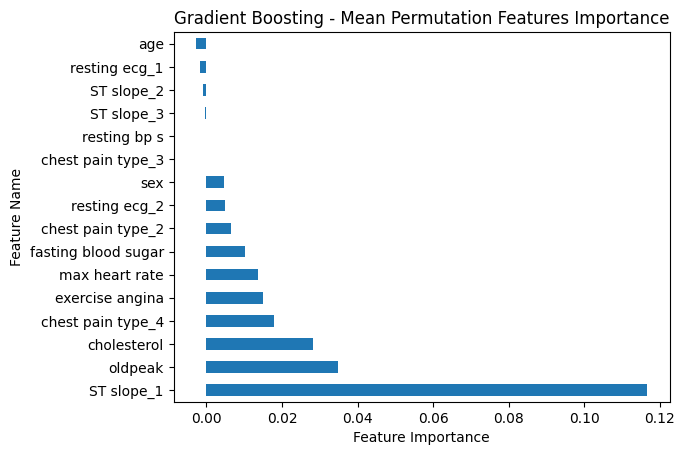

In [31]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
gradient_permutation= permutation_importance(gradient_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(gradient_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Gradient Boosting - Mean Permutation Features Importance')
plt.show()


#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['age','resting ecg_1','ST slope_2','ST slope_3','resting bp s','chest pain type_3','sex','resting ecg_2','chest pain type_2']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [32]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =[ 'cholesterol', 'max heart rate', 'oldpeak']
#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [45]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test_perm)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)


accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient Boosting,83.42,0.776,0.842,0.877,0.859,0.659,0.115234,259.15


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

In [ ]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(xgboost_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['ST slope_3','age','resting bp s','chest pain type_3','resting ecg_1','chest pain type_2','max heart rate','cholesterol','resting ecg_2','ST slope_2','oldpeak','fasting blood sugar','sex']

#Remove selected features from x_train and x_test
#x_train_embedded = x_train.drop(columns=features_remove)
#x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =[]

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Initialize RobustScaler
#scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
#x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [36]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
ieee_xgb.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the ieee_xgb
target_pred_xgb = ieee_xgb.predict(x_test_embedded)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,81.52,0.821,0.86,0.811,0.835,0.627


In [49]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       85.84
Precision       0.87
Recall          0.88
F1 Score        0.87
MCC             0.71
Specificity     0.83
dtype: float64

Standard Deviation Metrics:
Accuracy       4.45
Precision      0.04
Recall         0.05
F1 Score       0.04
MCC            0.09
Specificity    0.06
dtype: float64


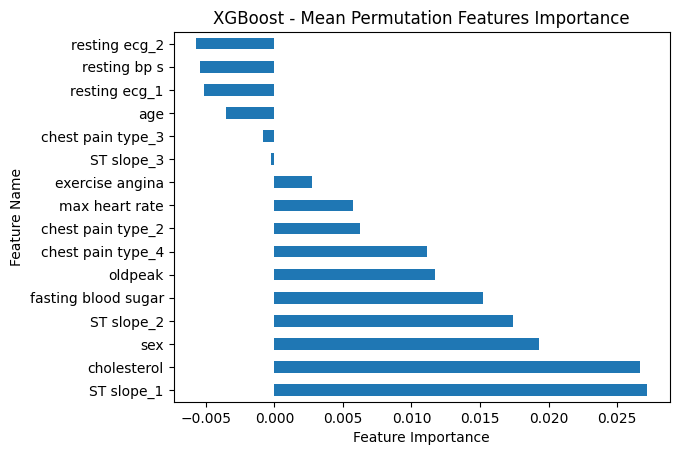

In [41]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
xgboost_permutation= permutation_importance(xgboost_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(xgboost_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('XGBoost - Mean Permutation Features Importance')
plt.show()


#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least relevant features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['resting ecg_2','resting bp s', 'resting ecg_1','age','chest pain type_3','ST slope_3','exercise angina','max heart rate']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [43]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =[ 'cholesterol', 'oldpeak']

#Separate target column
x_simple = data_ieee_coded.drop(columns=['target'] + features_remove)
y_simple = data_ieee_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[ieee_numerical] = scaler.fit_transform(x_simple[ieee_numerical])

In [44]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
ieee_xgb.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the ieee_xgb
target_pred_xgb = ieee_xgb.predict(x_test_perm)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,85.33,0.795,0.856,0.896,0.876,0.698


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       85.19
Precision      86.23
Recall         87.27
F1 Score       86.66
MCC            70.18
Specificity    82.60
dtype: float64

Standard Deviation Metrics:
Accuracy       4.17
Precision      3.87
Recall         5.57
F1 Score       3.89
MCC            8.40
Specificity    5.31
dtype: float64


**Wrapper Methods of Feature Selection: Backwards Elimination**

In [50]:
pip install mlxtend

**Backward Elimination: Decision Tree Classifier**

In [112]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate decision tree classifier and set random state to ensure reproducibility of the results
decision_backward =DecisionTreeClassifier(random_state = 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=decision_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train)

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
16  0.801818  (age, sex, resting bp s, cholesterol, fasting ...
15      0.82  (age, sex, resting bp s, cholesterol, fasting ...
14  0.814545  (age, sex, cholesterol, fasting blood sugar, m...
13  0.818182  (age, sex, cholesterol, fasting blood sugar, m...
12  0.807273  (age, sex, cholesterol, fasting blood sugar, m...
11  0.803636  (age, sex, cholesterol, fasting blood sugar, o...
10      0.82  (sex, cholesterol, fasting blood sugar, oldpea...
9   0.832727  (sex, fasting blood sugar, oldpeak, chest pain...
8   0.838182  (sex, fasting blood sugar, oldpeak, chest pain...
7   0.845455  (sex, fasting blood sugar, chest pain type_2, ...
6   0.843636  (sex, fasting blood sugar, chest pain type_2, ...
5   0.838182  (sex, fasting blood sugar, chest pain type_2, ...
4   0.829091  (sex, fasting blood sugar, chest pain type_3, ...
3   0.818182  (fasting blood sugar, chest pain type_3, ST sl...
2   0.794545                  (fasting b

In [113]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [114]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =[]

#Initialize RobustScaler
#scaler = RobustScaler()

#Initialize RobustScaler
#scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
#x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,sex,fasting blood sugar,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_2,ST slope_2
0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1
2,1,0,1,0,0,0,0
3,0,0,0,0,1,0,1
4,1,0,0,1,0,0,0


In [115]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_decision_tree.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the ieee_decision_tree model
target_pred_decision_tree = ieee_decision_tree.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,80.71,0.795,0.844,0.816,0.83,0.608,0.011844,261.84


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_ieee_dt = GridSearchCV(ieee_decision_tree , param_grid, cv=10)
grid_ieee_dt.fit(x_train_backward, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_ieee_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
ieee_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
ieee_decision_tree.fit(x_train_backward, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = ieee_decision_tree.predict(x_test_backward)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

In [116]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = ieee_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       81.88
Precision      84.53
Recall         82.62
F1 Score       83.42
MCC            63.73
Specificity    80.98
dtype: float64

Standard Deviation Metrics:
Accuracy       3.56
Precision      4.03
Recall         5.60
F1 Score       3.40
MCC            7.11
Specificity    6.16
dtype: float64


**Backward Elimination: Random Forest**

In [117]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
random_backward =RandomForestClassifier(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=random_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 16 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
16  0.870909  (age, sex, resting bp s, cholesterol, fasting ...
15  0.885455  (sex, resting bp s, cholesterol, fasting blood...
14  0.885455  (sex, resting bp s, cholesterol, max heart rat...
13  0.883636  (sex, resting bp s, cholesterol, max heart rat...
12  0.887273  (sex, resting bp s, cholesterol, max heart rat...
11  0.883636  (sex, resting bp s, max heart rate, exercise a...
10  0.878182  (sex, resting bp s, max heart rate, oldpeak, c...
9   0.874545  (sex, resting bp s, max heart rate, oldpeak, c...
8   0.870909  (sex, resting bp s, max heart rate, oldpeak, c...
7   0.874545  (sex, resting bp s, max heart rate, oldpeak, c...
6   0.861818  (sex, resting bp s, max heart rate, oldpeak, c...
5   0.850909  (sex, resting bp s, oldpeak, chest pain type_4...
4   0.854545      (sex, oldpeak, chest pain type_4, ST slope_2)
3   0.830909           (oldpeak, chest pain type_4, ST slope_2)
2   0.812727                            

In [118]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [119]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['cholesterol', 'max heart rate', 'resting bp s', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,sex,resting bp s,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,ST slope_1,ST slope_2
0,1,0.5,0.704000,0.944444,0,-0.400000,1,0,0,0,1,0
1,0,1.5,-0.458667,0.500000,0,0.266667,0,1,0,0,0,1
2,1,0.0,0.640000,-1.111111,0,-0.400000,1,0,0,1,1,0
3,0,0.4,-0.096000,-0.833333,1,0.600000,0,0,1,0,0,1
4,1,1.0,-0.298667,-0.444444,0,-0.400000,0,1,0,0,1,0


In [120]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_random_forest.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the ieee_random_forest model
target_pred_random_forest = ieee_random_forest.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,83.7,0.776,0.842,0.882,0.862,0.664,0.831384,262.1


In [121]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
ieee_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= ieee_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       86.42
Precision      86.46
Recall         89.76
F1 Score       87.98
MCC            72.68
Specificity    82.28
dtype: float64

Standard Deviation Metrics:
Accuracy       3.64
Precision      4.40
Recall         4.32
F1 Score       3.16
MCC            7.43
Specificity    6.47
dtype: float64


**Backward Elimination: Logistic Regression**

In [68]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
logistic_backward =LogisticRegression(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=logistic_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
16  0.867273  (age, sex, resting bp s, cholesterol, fasting ...
15  0.876364  (age, sex, resting bp s, cholesterol, fasting ...
14  0.878182  (age, sex, resting bp s, cholesterol, fasting ...
13      0.88  (sex, resting bp s, cholesterol, fasting blood...
12      0.88  (sex, resting bp s, cholesterol, fasting blood...
11  0.881818  (sex, resting bp s, fasting blood sugar, exerc...
10  0.883636  (sex, fasting blood sugar, exercise angina, ol...
9   0.883636  (sex, fasting blood sugar, exercise angina, ol...
8   0.881818  (sex, fasting blood sugar, exercise angina, ol...
7   0.876364  (sex, fasting blood sugar, exercise angina, ch...
6   0.878182  (sex, fasting blood sugar, exercise angina, ch...
5   0.874545  (sex, fasting blood sugar, exercise angina, ch...
4   0.874545  (sex, exercise angina, chest pain type_4, ST s...
3       0.86   (exercise angina, chest pain type_4, ST slope_1)
2       0.84                    (chest p

In [86]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [87]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,sex,fasting blood sugar,exercise angina,oldpeak,chest pain type_2,chest pain type_4,ST slope_1,ST slope_2
0,1,0,0,-0.400000,1,0,1,0
1,0,0,0,0.266667,0,0,0,1
2,1,0,0,-0.400000,1,0,1,0
3,0,0,1,0.600000,0,1,0,1
4,1,0,0,-0.400000,0,0,1,0


In [88]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_logistic_reg.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the ieee_logistic_reg model
target_pred_logistic_reg = ieee_logistic_reg.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,83.15,0.769,0.838,0.877,0.857,0.653,0.011889,261.59


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_logistic_reg = LogisticRegression(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= ieee_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



**Backward Elimination: Support Vector Machine**

In [107]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
support_vector_backward =svm.SVC(kernel='linear', random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=support_vector_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])


   avg_score                                      feature_names
16  0.865455  (age, sex, resting bp s, cholesterol, fasting ...
15  0.872727  (age, sex, resting bp s, cholesterol, fasting ...
14  0.872727  (age, sex, resting bp s, cholesterol, fasting ...
13  0.874545  (sex, resting bp s, cholesterol, fasting blood...
12  0.872727  (sex, resting bp s, cholesterol, fasting blood...
11  0.874545  (sex, resting bp s, cholesterol, fasting blood...
10  0.874545  (sex, resting bp s, cholesterol, fasting blood...
9   0.881818  (sex, resting bp s, cholesterol, fasting blood...
8       0.88  (sex, resting bp s, cholesterol, fasting blood...
7   0.883636  (sex, cholesterol, fasting blood sugar, exerci...
6   0.870909  (sex, cholesterol, fasting blood sugar, exerci...
5   0.850909  (cholesterol, fasting blood sugar, exercise an...
4   0.849091  (fasting blood sugar, exercise angina, oldpeak...
3   0.829091             (exercise angina, oldpeak, ST slope_2)
2   0.829091                      (exerc

In [108]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [109]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['cholesterol', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,sex,cholesterol,fasting blood sugar,exercise angina,oldpeak,chest pain type_4,ST slope_2
0,1,0.704000,0,0,-0.400000,0,0
1,0,-0.458667,0,0,0.266667,0,1
2,1,0.640000,0,0,-0.400000,0,0
3,0,-0.096000,0,1,0.600000,1,1
4,1,-0.298667,0,0,-0.400000,0,0


In [110]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_support_vector.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = ieee_support_vector.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,86.14,0.814,0.868,0.896,0.882,0.715,0.01823,261.84


In [146]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= ieee_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold





Mean Metrics:
Accuracy       86.89
Precision       0.87
Recall          0.89
F1 Score        0.88
MCC             0.74
Specificity     0.84
dtype: float64

Standard Deviation Metrics:
Accuracy       3.63
Precision      0.04
Recall         0.04
F1 Score       0.03
MCC            0.07
Specificity    0.05
dtype: float64


**Backward Elimination: Gradient Boosting**

In [80]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
gradient_backward =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=gradient_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
16  0.852727  (age, sex, resting bp s, cholesterol, fasting ...
15  0.858182  (age, sex, resting bp s, cholesterol, fasting ...
14  0.858182  (sex, resting bp s, cholesterol, fasting blood...
13      0.86  (sex, resting bp s, cholesterol, fasting blood...
12  0.861818  (sex, resting bp s, cholesterol, fasting blood...
11  0.865455  (sex, resting bp s, cholesterol, fasting blood...
10  0.869091  (sex, cholesterol, fasting blood sugar, exerci...
9   0.874545  (sex, fasting blood sugar, exercise angina, ol...
8       0.88  (sex, fasting blood sugar, exercise angina, ol...
7   0.876364  (sex, fasting blood sugar, exercise angina, ch...
6   0.876364  (sex, exercise angina, chest pain type_2, ches...
5   0.874545  (sex, exercise angina, chest pain type_2, ches...
4   0.870909  (sex, exercise angina, chest pain type_4, ST s...
3       0.86   (exercise angina, chest pain type_4, ST slope_1)
2       0.84                    (chest p

In [100]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [101]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,sex,fasting blood sugar,exercise angina,oldpeak,chest pain type_2,chest pain type_4,ST slope_1,ST slope_2
0,1,0,0,-0.400000,1,0,1,0
1,0,0,0,0.266667,0,0,0,1
2,1,0,0,-0.400000,1,0,1,0
3,0,0,1,0.600000,0,1,0,1
4,1,0,0,-0.400000,0,0,1,0


In [103]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable ieee_decision_tree. Assign random_state 42 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the support vector machine classifier
ieee_gradient.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the ieee_gradient
target_pred_gradient = ieee_gradient.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient Boosting,82.88,0.763,0.834,0.877,0.855,0.647,0.112811,261.84


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



**Backward Elimination: XGBoost**

In [122]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
xgb_backward =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=xgb_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
16      0.86  (age, sex, resting bp s, cholesterol, fasting ...
15  0.874545  (age, sex, resting bp s, cholesterol, fasting ...
14  0.874545  (age, sex, resting bp s, cholesterol, fasting ...
13  0.878182  (age, sex, resting bp s, cholesterol, fasting ...
12  0.887273  (age, sex, resting bp s, cholesterol, fasting ...
11  0.876364  (age, sex, resting bp s, cholesterol, fasting ...
10  0.876364  (age, sex, resting bp s, cholesterol, fasting ...
9   0.867273  (age, sex, resting bp s, cholesterol, fasting ...
8   0.869091  (age, sex, resting bp s, cholesterol, exercise...
7   0.867273  (age, sex, cholesterol, exercise angina, oldpe...
6   0.863636  (sex, cholesterol, exercise angina, oldpeak, c...
5   0.874545  (sex, cholesterol, exercise angina, oldpeak, S...
4   0.861818  (cholesterol, exercise angina, oldpeak, ST slo...
3   0.849091             (exercise angina, oldpeak, ST slope_2)
2   0.829091                      (exerc

In [104]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [123]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
ieee_numerical =['age', 'cholesterol', 'resting bp s', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_ieee_coded.drop(columns=['target'])
y_backward = data_ieee_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[ieee_numerical] = scaler.fit_transform(x_backward[ieee_numerical])

x_backward.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,exercise angina,oldpeak,chest pain type_2,chest pain type_4,ST slope_1,ST slope_2,ST slope_3
0,-1.076923,1,0.5,0.704000,0,0,-0.400000,1,0,1,0,0
1,-0.384615,0,1.5,-0.458667,0,0,0.266667,0,0,0,1,0
2,-1.307692,1,0.0,0.640000,0,0,-0.400000,1,0,1,0,0
3,-0.461538,0,0.4,-0.096000,0,1,0.600000,0,1,0,1,0
4,0.000000,1,1.0,-0.298667,0,0,-0.400000,0,0,1,0,0


In [124]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
ieee_xgb.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = ieee_xgb.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,84.78,0.814,0.864,0.873,0.869,0.688,0.661045,263.65


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable ieee_decision_tree. Assign random_state 0 to reproduce results
ieee_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    ieee_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= ieee_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



**Backward Elimination: Naive Bayes**

In [140]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on categorical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_cat_backward =CategoricalNB()

ieee_categorical_nb = ['sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'ST slope_1', 'ST slope_2','ST slope_3']
ieee_numerical_nb = ['age','resting bp s','cholesterol','max heart rate','oldpeak']

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_cat_backward,
           k_features=(1, len(ieee_categorical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[ieee_categorical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

  avg_score                                      feature_names
9  0.874545  (sex, fasting blood sugar, exercise angina, ch...
8  0.876364  (sex, fasting blood sugar, exercise angina, ch...
7  0.869091  (sex, exercise angina, chest pain type_2, ches...
6  0.863636  (sex, exercise angina, chest pain type_3, ches...
5  0.858182  (sex, exercise angina, chest pain type_3, ches...
4  0.861818  (sex, exercise angina, chest pain type_3, ST s...
3  0.850909                 (sex, exercise angina, ST slope_1)
2      0.84                                  (sex, ST slope_1)
1      0.84                                      (ST slope_1,)
(0, 1, 2, 3, 4, 5, 6, 7)
('sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'ST slope_1', 'ST slope_2')


In [141]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on numerical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_num_backward =GaussianNB()

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_num_backward,
           k_features=(1, len(ieee_numerical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[ieee_numerical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

  avg_score                                      feature_names
5  0.770909  (age, resting bp s, cholesterol, max heart rat...
4  0.776364          (age, resting bp s, cholesterol, oldpeak)
3  0.774545                        (age, cholesterol, oldpeak)
2  0.749091                             (cholesterol, oldpeak)
1  0.716364                                         (oldpeak,)
(0, 1, 2, 4)
('age', 'resting bp s', 'cholesterol', 'oldpeak')


In [144]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
ieee_naive_numerical = GaussianNB()
ieee_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
ieee_categorical_nb = ['sex', 'fasting blood sugar', 'exercise angina', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'ST slope_1', 'ST slope_2']
ieee_numerical_nb = ['age','resting bp s','cholesterol','oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
ieee_naive_categorical.fit(x_train[ieee_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
ieee_naive_numerical.fit(x_train[ieee_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = ieee_naive_categorical.predict_proba(x_test[ieee_categorical_nb])
probability_numerical= ieee_naive_numerical.predict_proba(x_test[ieee_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,85.6,0.788,0.853,0.906,0.879,0.704,0.019461,263.91


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

# List categorical and numerical feature names
ieee_categorical_nb = ['sex', 'exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3']
ieee_numerical_nb = ['trestbps','thalach','oldpeak']

# Initialize Naive Bayes models and assign to variables
ieee_naive_categorical = CategoricalNB()
ieee_naive_numerical = GaussianNB()

# Combine categorical and numerical features
x_train_backward = x_train[ieee_categorical_nb + ieee_numerical_nb]

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_train, y_train):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_train_backward.iloc[train_index], x_train_backward.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the training data set to the categorical and numerical Naive Bayes models
    ieee_naive_categorical.fit(x_train_fold[ieee_categorical_nb], y_train_fold.values.ravel())
    ieee_naive_numerical.fit(x_train_fold[ieee_numerical_nb], y_train_fold.values.ravel())

    # Predict probabilities for using categorical and numerical features
    probability_categorical = ieee_naive_categorical.predict_proba(x_test_fold[ieee_categorical_nb])
    probability_numerical = ieee_naive_numerical.predict_proba(x_test_fold[ieee_numerical_nb])

    # Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    # Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    # Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))

# Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive

In [ ]:
pip install geneticalgorithm

**Genetic Algorithm: Decision Tree**

In [ ]:
#Import classes to perform genetic algorithm
#Use the genetic algorithm class from pypi
from geneticalgorithm import geneticalgorithm as ga
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Import classes for cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import dataframe libraries
import numpy as np
import pandas as pd

#Set random seed to allow for reproducibility of both the random forest classifier and the genetic algorithm. Specifying the random state in random forest classifier alone will not allow for reproducibility
np.random.seed(42)

#Create a function to maximize the accuracy of the scikit classifier
def objective_function(x):
    #Features that are included in candidate solutions are marked with a 1 and passed to the objective function internally without explicitly calling the objective function
    #Select column indices from the feature array where features are marked with 1
    selected_features = np.where(x == 1)[0]

    # Create classifier
    ieee_decision_tree = DecisionTreeClassifier(random_state=42)

    #Create the k-folds
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    #Evaluate performance metrics
    accuracy = round(cross_val_score(ieee_decision_tree, x_train.iloc[:, selected_features], y_train, scoring='accuracy', cv=cv, n_jobs=-1).mean()*100,2)

    return -accuracy #Documentation indicates that the genetic algorithm is a minimization function. Therefore, it is neccessary to return the negative of the accuracy

#Each feature may be present or absent from the model
#Create an binary array with one row per feature
#Each row indicates the bounds of elements in the candidate solution array with 1 for presence and 0 for absence
include_feature = np.array([[0, 1]] * len(x_train.columns))

#Create the genetic algorithm optimizer
algorithm_param = {'max_num_iteration': 100, 'population_size': 10, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'max_iteration_without_improv': None, 'crossover_type': 'uniform'}

#Create genetic algorithm instance using the previoulsy defined objective function
#Setting variable type to boolean indicates that features should be selected or ignored by the genetic algorithm
genetic_select = ga(function=objective_function, dimension=len(x_train.columns), variable_type='bool', variable_boundaries=include_feature, algorithm_parameters=algorithm_param)

#Fit the genetic algorithm
genetic_select.run()

#Access binary array denoted as variable indicating which features have been selected
best_solution = genetic_select.output_dict['variable']
#Select column indices from the feature array where features are marked with 1
selected_features = np.where(best_solution == 1)[0]

#Output selected features
selected_features

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
x_train_genetic = x_train.iloc[:,selected_features]
x_test_genetic = x_test.iloc[:,selected_features]